In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats

In [2]:
m=pd.read_csv('matches.csv')
d=pd.read_csv('deliveries.csv')
m
d

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [3]:
m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
m.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [5]:
m.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [6]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
d.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


1      1
2      4
3     15
4     34
5     57
6     68
7     70
8     48
9     32
10    10
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

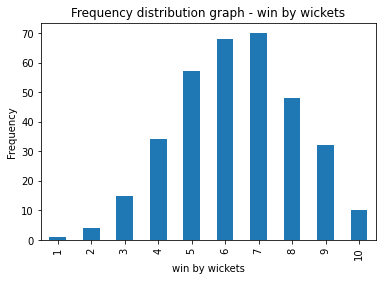

In [8]:
win_by_wickets_data = m[m.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency distribution graph - win by wickets")
plt.set_xlabel("win by wickets")
plt.set_ylabel("Frequency")

1     0.002950
2     0.011799
3     0.044248
4     0.100295
5     0.168142
6     0.200590
7     0.206490
8     0.141593
9     0.094395
10    0.029499
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency (%)')

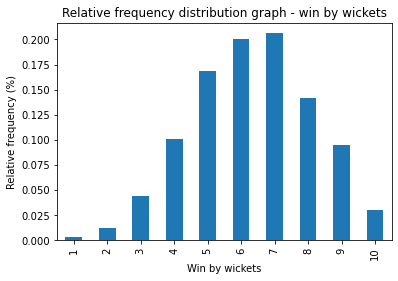

In [9]:
win_by_wickets_rel_freq=win_by_wickets_data.value_counts(sort=False,normalize = True)
print(win_by_wickets_rel_freq)
plt=win_by_wickets_rel_freq.plot.bar()
plt.set_title("Relative frequency distribution graph - win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Relative frequency (%)")

1     0.002950
2     0.014749
3     0.058997
4     0.159292
5     0.327434
6     0.528024
7     0.734513
8     0.876106
9     0.970501
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Cumulative relative frequency (%)')

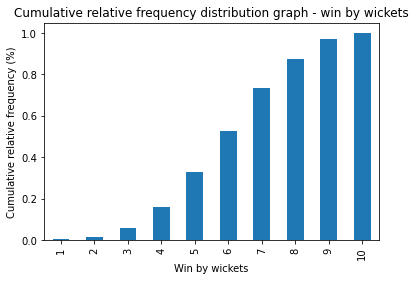

In [10]:
win_by_wickets_cumulative_freq=win_by_wickets_data.value_counts(sort=False,normalize = True).cumsum()
print(win_by_wickets_cumulative_freq)
plt=win_by_wickets_cumulative_freq.plot.bar()
plt.set_title("Cumulative relative frequency distribution graph - win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Cumulative relative frequency (%)")

In [11]:
# Get mean (mu) and std (sigma) 
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()
win_by_wickets_data.mean()

6.327433628318584

In [12]:
win_by_wickets_data.std()

1.796326681897412

<AxesSubplot:>

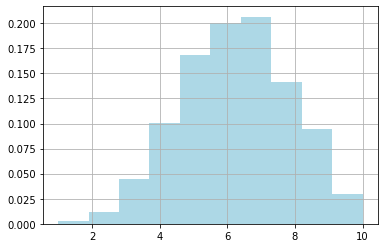

In [13]:
# Plot histogram (normalized) - LIGHT-BLUE 
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count()) 

<AxesSubplot:>

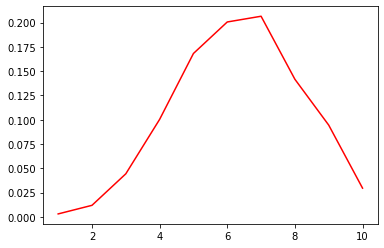

In [14]:
# Plot line graph - RED 
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red') 

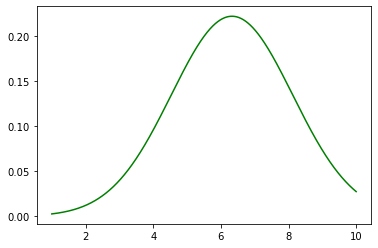

In [15]:
# Normal distribution for random points between 7 to 10 with mean, std. 
random_data = np.arange(1, 10, 0.001) 
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green') 

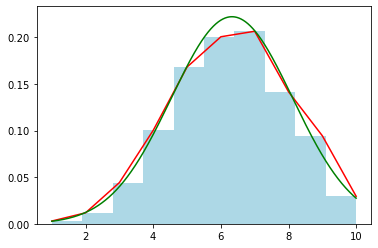

In [16]:
# Get mean (mu) and std (sigma) 
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()
# Plot histogram (normalized) - LIGHT-BLUE 
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())
# Plot line graph - RED 
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red') 
# Normal distribution for random points between 7 to 10 with mean, std. 
random_data = np.arange(1, 10, 0.001) 
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green') 